In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
#Définition des constante gravitationnelle utiles :
G = 6.674*10**(-11) #Constante gravitationelle

#Constante liées aux planètes :
#Terre :
Rt = 6371*10**3     #Rayon terrestre
Mt = 5.972*10**24  #Masse terrestre
#Soleil :
Rs = 6.957*10**8 #Rayon du soleil
Ms = 1.9885*10**30 #Masse solaire

In [2]:
#Programme de base résolvant les trajectoires :
#fx, fy : deux composantes de la force supplémentaire
#A = G*M masse du corps
#CI : list avec condition initiale sous la forme [xi, yi, vxi, vyi] 
#T : temps d'intégration (intialisé à 100 min par défaut)
#plotGraphe : Option de plot de graphe (x, y)+ Trajectoire dans le plan (Oxy) True par défaut
def Resolution_Trajectoire(A, fx, fy, CI, T = 6000, plotGraphe = True, periode = False): 
    def model(Z,t):
        x, y, vx, vy = Z
        f = fx(x, y, vx, vy, t)
        g = fy(x, y, vx, vy, t)
        dxdt = vx
        dydt = vy
        dvxdt = -(A*x)/(x**2 + y**2)**(3/2) + f
        dvydt = -(A*y)/(x**2 + y**2)**(3/2) + g
        return [dxdt, dydt, dvxdt, dvydt]
    temps = np.linspace(0, T, 1000) #Création array temps
    #Calcul de la trajectoire :
    Trajectoire = odeint(model, CI, temps)
    #Récupération des données (x, y, vx, vy)
    x, y, vx, vy = Trajectoire.T[0], Trajectoire.T[1], Trajectoire.T[2], Trajectoire.T[3]
    if plotGraphe == True:
        #Coordonnées de la surface de la Terre :
        theta = np.linspace(0, 2*np.pi, 100)
        Sx = Rt*np.cos(theta)
        Sy = Rt*np.sin(theta)
        #Graphe de x(t), y(t)
        fig1 = plt.figure()
        plt.plot(temps, x, label = r'$x(t)$')
        plt.plot(temps, y, label = r'$y(t)$')
        plt.legend()
        plt.grid()
        plt.show()
        #Graphe de la trajectoire y = f(x)
        fig2 = plt.figure()
        plt.plot(x, y, label = 'Trajectoire', color = 'orange')
        plt.plot(Sx, Sy, color = 'blue', label = 'Surface Terrestre')
        plt.xlabel(r'$x$ $(m)$')
        plt.ylabel(r'$y$ $(m)$')
        plt.grid()
        plt.legend()
        plt.show()
    if periode:
        y = Trajectoire.T[1]
        min = np.abs(y[1])
        i = 1
        while(np.abs(y[i+1])>min):
            i = i+1
        print('Période T = ', 2*temps[i], 's, soit ', 2*temps[i]/60, 'min', 'ou encore ', 2*temps[i]/3600, 'heures')
    return (x, y, vx, vy)        

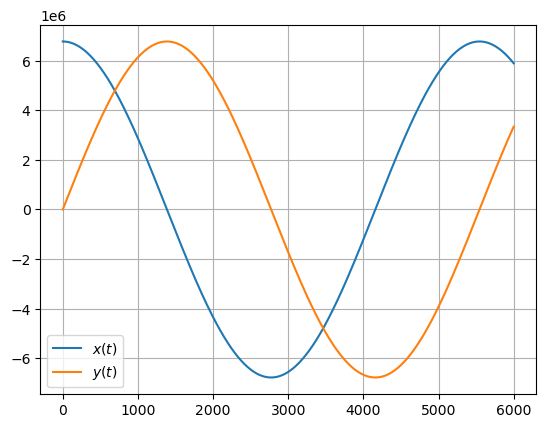

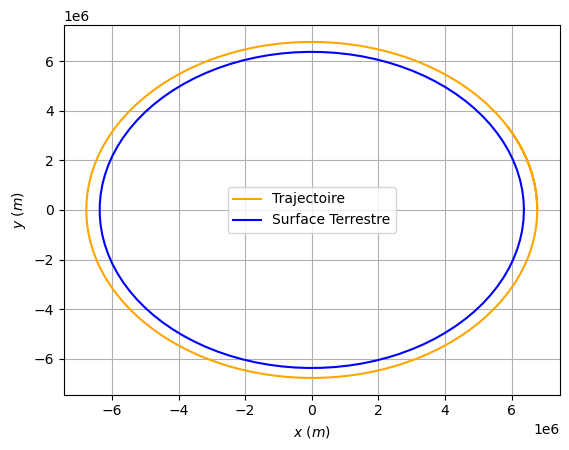

Période T =  5525.525525525525 s, soit  92.09209209209209 min ou encore  1.534868201534868 heures


In [3]:
#Cas où (fx, fy)=(0, 0), rotation autour de la Terre vitesse intiale orthoradiale :
#(On supposera la voile en x=h+Rt à t=0, et donc vi selon uy)

#Définition des paramètres de la trajectoire :
h = 400*10**3  #Hauteur initiale
At = G*Mt 
vi = np.sqrt(G*Mt/(Rt+h))
CI = [Rt+h, 0, 0, vi]

#Définition des force externes :
def fx(x, y, vx, vy, t):
    return 0
def fy(x, y, vx, vy, t):
    return 0

#Calcul de la trajectoire :
Circulaire_Terre = Resolution_Trajectoire(At, fx, fy, CI, periode = True)

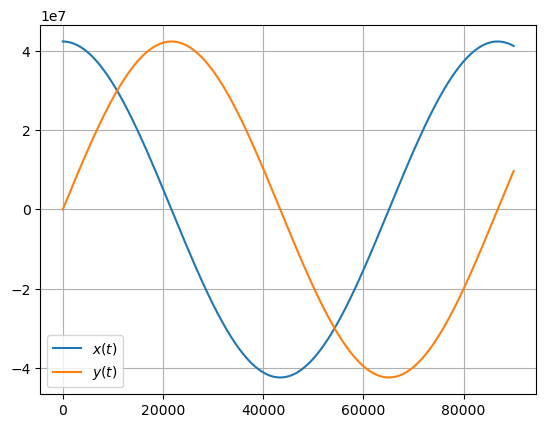

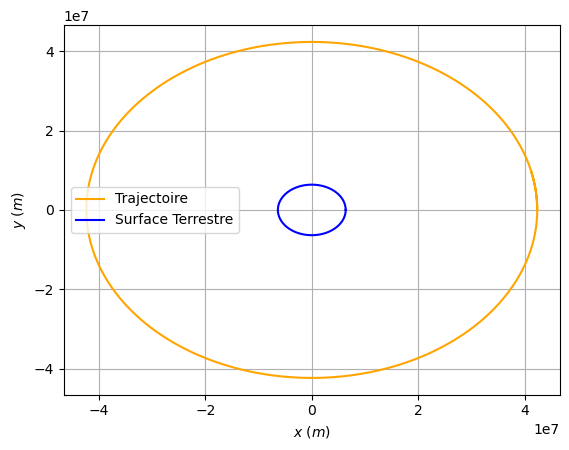

Période T =  86486.48648648648 s, soit  1441.4414414414414 min ou encore  24.024024024024023 heures
Vitesse initiale :  3067.0343763111014


In [4]:
#Cas où (fx, fy)=(0, 0), rotation autour de la Terre vitesse intiale orthoradiale :
#Orbite géostationnaire

#Définition des paramètres de la trajectoire :
h = 36000*10**3  #Hauteur initiale
At = G*Mt 
vi = np.sqrt(G*Mt/(Rt+h))
CI = [Rt+h, 0, 0, vi]

#Définition des force externes :
def fx(x, y, vx, vy, t):
    return 0
def fy(x, y, vx, vy, t):
    return 0

#Calcul de la trajectoire :
Geost = Resolution_Trajectoire(At, fx, fy, CI, T = 25*3600, periode = True)
print('Vitesse initiale : ', vi)

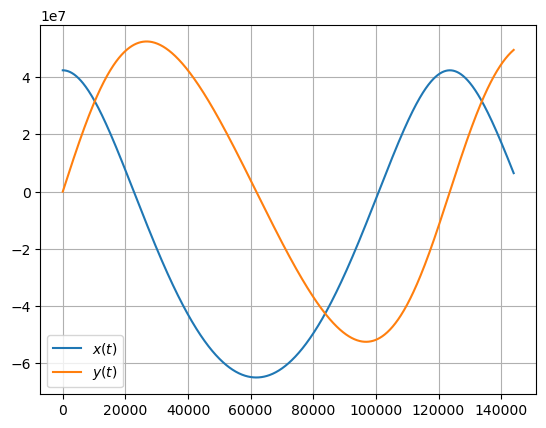

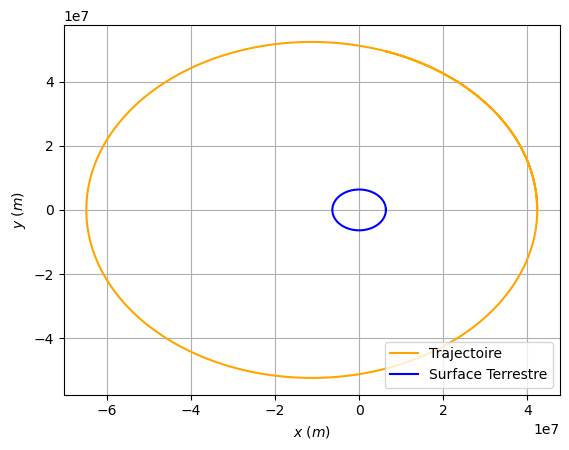

Période T =  123099.0990990991 s, soit  2051.6516516516517 min ou encore  34.194194194194196 heures


In [5]:
#Trajectoire elliptique :
#Cas où (fx, fy)=(0, 0), rotation autour de la Terre vitesse intiale orthoradiale :
#Orbite géostationnaire

#Définition des paramètres de la trajectoire :
h = 36000*10**3  #Hauteur initiale
At = G*Mt 
vi = 1.1*np.sqrt(G*Mt/(Rt+h))
CI = [Rt+h, 0, 0, vi]

#Définition des force externes :
def fx(x, y, vx, vy, t):
    return 0
def fy(x, y, vx, vy, t):
    return 0

#Calcul de la trajectoire :
Geost = Resolution_Trajectoire(At, fx, fy, CI, T = 40*3600, periode = True)

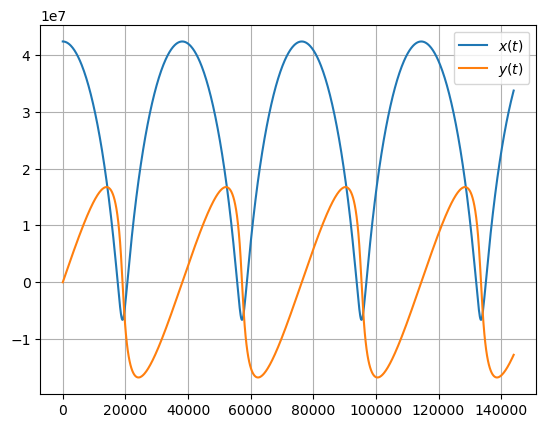

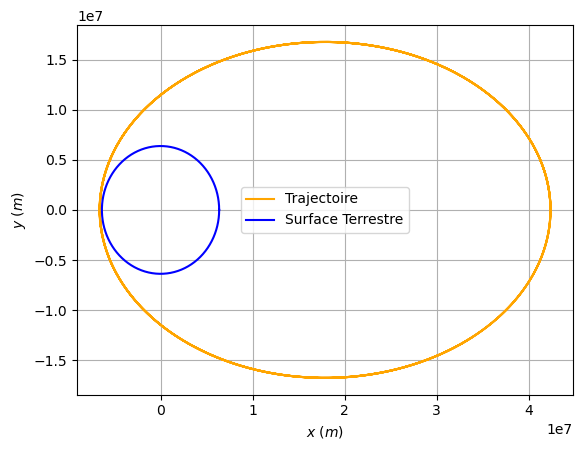

Période T =  75819.81981981982 s, soit  1263.6636636636638 min ou encore  21.06106106106106 heures
Vitesse critique :  1594.8578756817728


In [6]:
#Trajectoire elliptique : vitesse critique de frappe
#Cas où (fx, fy)=(0, 0), rotation autour de la Terre vitesse intiale orthoradiale :
#Orbite géostationnaire intiale

#Définition des paramètres de la trajectoire :
h = 36000*10**3  #Hauteur initiale
At = G*Mt
vi = 0.52*np.sqrt(G*Mt/(Rt+h))
CI = [Rt+h, 0, 0, vi]

#Définition des force externes :
def fx(x, y, vx, vy, t):
    return 0
def fy(x, y, vx, vy, t):
    return 0

#Calcul de la trajectoire :
TrajectoireCritique = Resolution_Trajectoire(At, fx, fy, CI, T = 40*3600, periode = True)
print('Vitesse critique : ', vi)

In [46]:
#Trajectoire elliptique : vitesse critique de frappe
#Cas où (fx, fy)=(0, 0), rotation autour de la Terre vitesse intiale orthoradiale :
#Orbite géostationnaire intiale

#Définition des paramètres de la trajectoire :
h = 36000*10**3  #Hauteur initiale
At = G*Mt
vi = np.sqrt(G*Mt/(Rt+h))
CI = [Rt+h, 0, 0, vi]
print('Vitesse initiale : ', vi)
#Définition des force externes :
def fx(x, y, vx, vy, t):
    return 0
def fy(x, y, vx, vy, t):
    return 0

k = 0.01
CI = [Rt+h, 0, 0, vi]
TrajectoireCritique = Resolution_Trajectoire(At, fx, fy, CI, T = 40*3600, plotGraphe = False,periode = False)
v_min = 0
v_max = vi
while np.abs(v_max-v_min)> k:
    m = (v_max + v_min) / 2
    CI = [Rt+h, 0, 0, m]
    TrajectoireCritique = Resolution_Trajectoire(At, fx, fy, CI, T = 40*3600, plotGraphe = False,periode = False)
    if np.sqrt(np.min(TrajectoireCritique[0]**2+TrajectoireCritique[1]**2)) > Rt:
        v_max = m
    else:
        v_min = m
print('vitesse critique min (Terre touchée)', v_min,'vitesse critique max(Terre pas touchée)', v_max)



Vitesse initiale :  3067.0343763111014
vitesse critique min (Terre touchée) 1568.1310690847974 vitesse critique max(Terre pas touchée) 1568.1369189886218


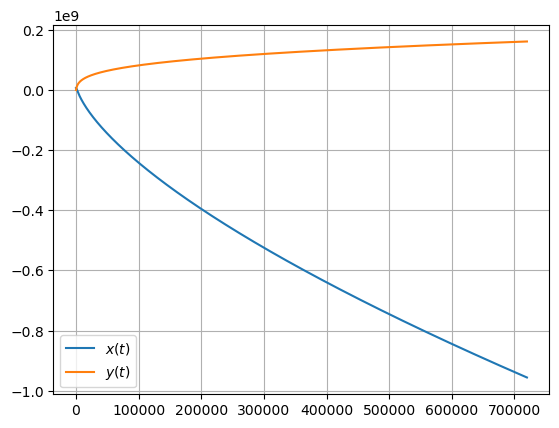

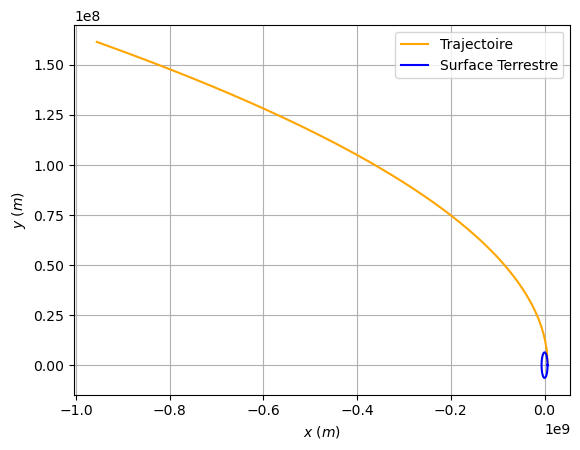

Vitesse de libération :  10850.296138970241


In [47]:
#Trajectoire elliptique : 
#Cas où (fx, fy)=(0, 0), rotation autour de la Terre vitesse intiale orthoradiale :
#Orbite géostationnaire intiale

#Définition des paramètres de la trajectoire :
h = 400*10**3  #Hauteur initiale
At = G*Mt
vi = np.sqrt(2*G*Mt/(Rt+h))
CI = [Rt+h, 0, 0, vi]

#Définition des force externes :
def fx(x, y, vx, vy, t):
    return 0
def fy(x, y, vx, vy, t):
    return 0

#Calcul de la trajectoire :
TrajectoireCritique = Resolution_Trajectoire(At, fx, fy, CI, T = 200*3600)
print('Vitesse de libération : ', vi)

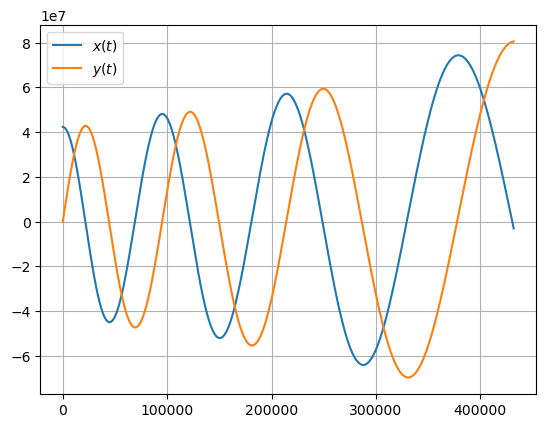

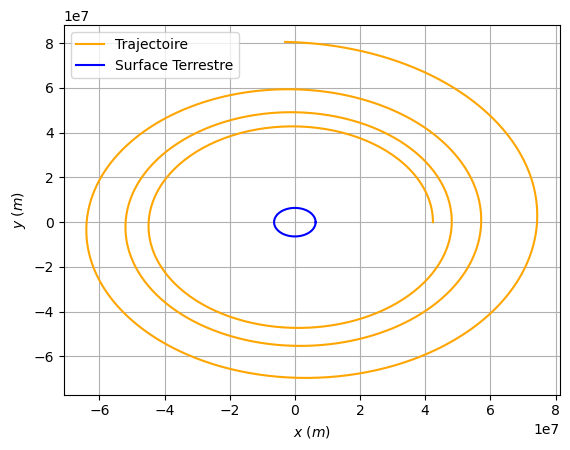

In [143]:
#Cas où force F constante orthoradiale, vitesse intiale orthoradiale (en orbite géostationnaire) :

#Définition des paramètres de la trajectoire :
h = 36000*10**3  #Hauteur initiale
At = G*Mt 
vi = np.sqrt(G*Mt/(Rt+h))
CI = [Rt+h, 0, 0, vi]
N = 0.002 #Newton (norme de la force constante)

#Définition des force externes :
def fx(x, y, vx, vy, t):
    return N*vx*(1/np.sqrt(vx**2+vy**2))
def fy(x, y, vx, vy, t):
    return N*vy*(1/np.sqrt(vx**2+vy**2))

#Calcul de la trajectoire :
ForceN_Eloignement = Resolution_Trajectoire(At, fx, fy, CI, T = 5*24*3600)

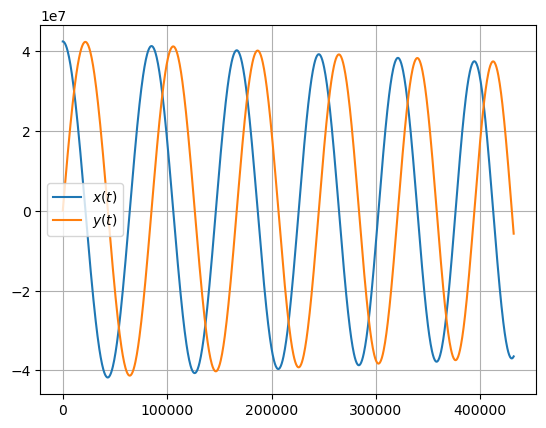

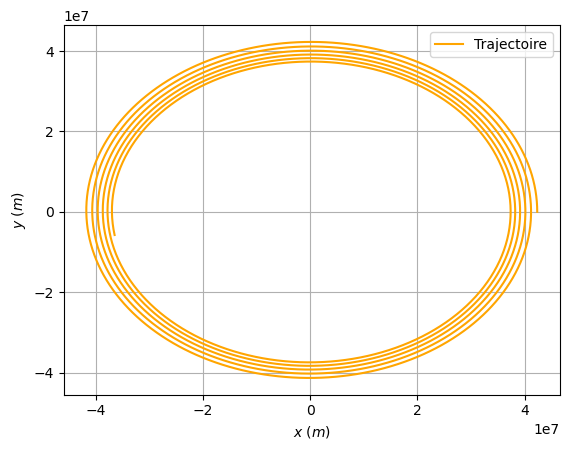

In [5]:
#Cas où force F constante orthoradiale, vitesse intiale orthoradiale (en orbite géostationnaire) :

#Définition des paramètres de la trajectoire :
h = 36000*10**3  #Hauteur initiale
At = G*Mt 
vi = np.sqrt(G*Mt/(Rt+h))
CI = [Rt+h, 0, 0, vi]
N = 0.0005 #Newton (norme de la force constante)

#Définition des force externes :
def fx(x, y, vx, vy, t):
    return -N*vx*(1/np.sqrt(vx**2+vy**2))
def fy(x, y, vx, vy, t):
    return -N*vy*(1/np.sqrt(vx**2+vy**2))

#Calcul de la trajectoire :
ForceN_Rapprochement = Resolution_Trajectoire(At, fx, fy, CI, T = 5*24*3600)

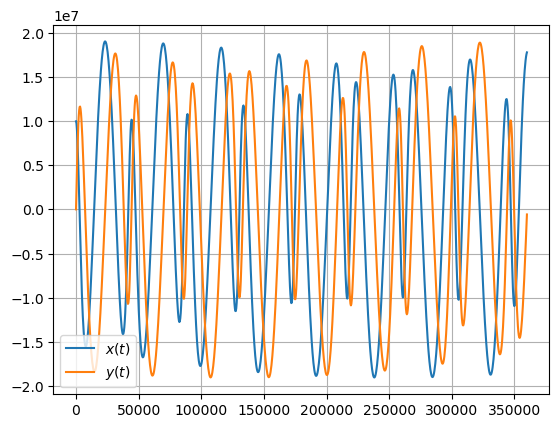

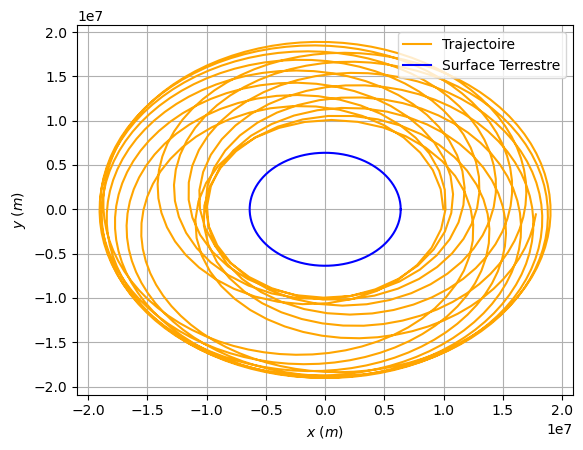

In [153]:
#Cas où force F constante radiale, vitesse intiale orthoradiale (en orbite géostationnaire) :

#Définition des paramètres de la trajectoire :
h = 3600*10**3  #Hauteur initiale
At = G*Mt 
vi = np.sqrt(G*Mt/(Rt+h))
CI = [Rt+h, 0, 0, vi]
N = 0.5 #Newton (norme de la force constante)

#Définition des force externes :
def fx(x, y, vx, vy, t):
    return N*x*(1/np.sqrt(x**2+y**2))
def fy(x, y, vx, vy, t):
    return N*y*(1/np.sqrt(x**2+y**2))
#Calcul de la trajectoire :
ForceRadiale = Resolution_Trajectoire(At, fx, fy, CI, T = 100*3600)